In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

# part1

In [69]:
def butter(im, t):
    w = im.shape[0]
    h = im.shape[1]
    G = np.zeros((w,h))
    N=2
    for i in range(0,w):
        for j in range(0,h):
            temp1 = (i-w//2)**2
            temp2 = (j-h//2)**2
            temp3 = sqrt(temp1 + temp2)
            temp4 = 1 + ((temp3/t)**(2*N))
            G[i,j] = 1/temp4
    
    F = np.fft.fftshift(np.fft.fft2(im))
    H = np.multiply(G,F)
    h = (np.fft.ifft2(np.fft.ifftshift(H))).real
    
                
    return h


In [75]:
def gauss(im, t):
    w = im.shape[0]
    h = im.shape[1]
    G = np.zeros((w,h))
    
    for i in range(w):
        for j in range(h):
            temp1 = (i-w//2)**2
            temp2 = (j-h//2)**2
            temp = sqrt(temp1 + temp2)
            temp2 = (temp**2)/(t**2)
            G[i,j] = np.exp(-temp2/2)

    
    F = np.fft.fftshift(np.fft.fft2(im))
    H = np.multiply(G,F)
    h = (np.fft.ifft2(np.fft.ifftshift(H))).real
    
                
    return h

In [76]:
def ideal(im, t):
    w = im.shape[0]
    h = im.shape[1]
    G = np.zeros((w,h))
    
    for i in range(w):
        for j in range(h):
            temp1 = (i-w//2)**2
            temp2 = (j-h//2)**2
            temp = sqrt(temp1 + temp2)
            if(temp>=t):
                G[i,j]= 1
            else:
                G[i,j]= 0

    
    F = np.fft.fftshift(np.fft.fft2(im))
    H = np.multiply(np.fft.fftshift(G),F)
    h = (np.fft.ifft2(np.fft.ifftshift(H))).real
    
                
    return h
    

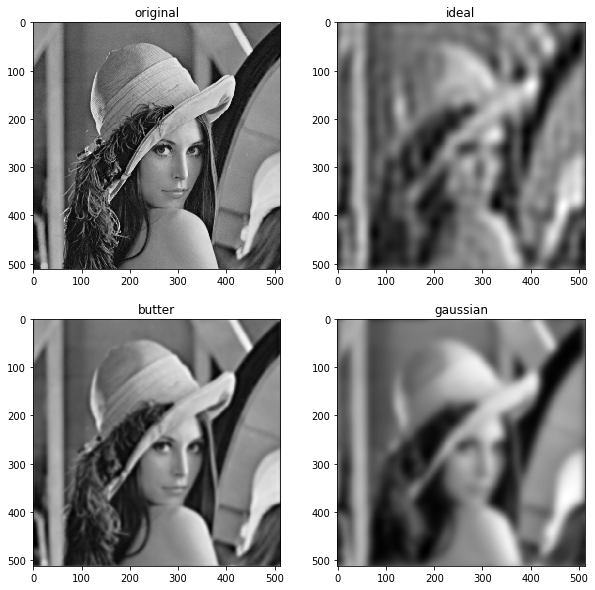

In [79]:
im = cv2.imread('../input_data/lena.jpg',0)
out1 = ideal(im,350)
out2 = butter(im,40)
out3 = gauss(im,10)

fig = plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(im,cmap='gray')
plt.title("original")
plt.subplot(222)
plt.imshow(out1,cmap='gray')
plt.title("ideal")
plt.subplot(223)
plt.imshow(out2,cmap='gray')
plt.title("butter")
plt.subplot(224)
plt.imshow(out3,cmap='gray')
plt.title("gaussian")
plt.show()


## part2

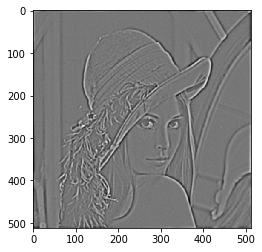

In [80]:
out3 = gauss(im,50)
out4 = gauss(im,40)

plt.imshow(out3-out4,cmap='gray')